In [94]:
import tensorflow as tf
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [95]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [96]:
base_model.trainable = False

In [97]:
keras=tf.keras
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [98]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [99]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [100]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)

In [101]:
train_it = datagen.flow_from_directory('drive/MyDrive/00AI/train/',
      target_size=(224, 224),
      color_mode='rgb',
      class_mode='binary',
      batch_size=8)

Found 105 images belonging to 2 classes.


In [102]:
valid_it = datagen.flow_from_directory('drive/MyDrive/00AI/valid/',
      target_size=(224, 224),
      color_mode='rgb',
      class_mode='binary',
      batch_size=8)

Found 80 images belonging to 2 classes.


In [103]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 62s 5s/step - loss: 2.4662 - binary_accuracy: 0.4607 - val_loss: 1.9367 - val_binary_accuracy: 0.6250
Epoch 2/20
12/12 [==============================] - 29s 3s/step - loss: 1.8800 - binary_accuracy: 0.5625 - val_loss: 0.8042 - val_binary_accuracy: 0.7500
Epoch 3/20
12/12 [==============================] - 19s 2s/step - loss: 1.0585 - binary_accuracy: 0.7083 - val_loss: 0.4724 - val_binary_accuracy: 0.8125
Epoch 4/20
12/12 [==============================] - 16s 1s/step - loss: 0.7507 - binary_accuracy: 0.7978 - val_loss: 0.4884 - val_binary_accuracy: 0.7812
Epoch 5/20
12/12 [==============================] - 17s 2s/step - loss: 0.5186 - binary_accuracy: 0.8090 - val_loss: 0.3199 - val_binary_accuracy: 0.8750
Epoch 6/20
12/12 [==============================] - 21s 2s/step - loss: 0.3582 - binary_accuracy: 0.8542 - val_loss: 0.4486 - val_binary_accuracy: 0.8750
Epoch 7/20
12/12 [==============================] - 14s 1s/step - loss: 0.30

In [104]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [105]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 21s 1s/step - loss: 0.0144 - binary_accuracy: 1.0000 - val_loss: 0.6357 - val_binary_accuracy: 0.8438
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 0.1373 - binary_accuracy: 0.9663 - val_loss: 0.1893 - val_binary_accuracy: 0.9375
Epoch 3/10
12/12 [==============================] - 16s 1s/step - loss: 0.0386 - binary_accuracy: 0.9792 - val_loss: 0.0730 - val_binary_accuracy: 0.9688
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 3.1677e-04 - binary_accuracy: 1.0000 - val_loss: 0.4389 - val_binary_accuracy: 0.9062
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 4.9827e-05 - binary_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9688
Epoch 6/10
12/12 [==============================] - 15s 1s/step - loss: 8.4883e-05 - binary_accuracy: 1.0000 - val_loss: 0.3175 - val_binary_accuracy: 0.9375
Epoch 7/10
12/12 [==============================] - 16s 1s/step 

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from tensorflow.keras.preprocessing import image as image_utils
#from tensorflow.keras.applications.imagenet_utils import preprocess_input
image_utils=tf.keras.preprocessing.image
preprocess_input=tf.keras.applications.vgg16.preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

In [107]:
def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 0s 128ms/step


array([[-28.95971]], dtype=float32)

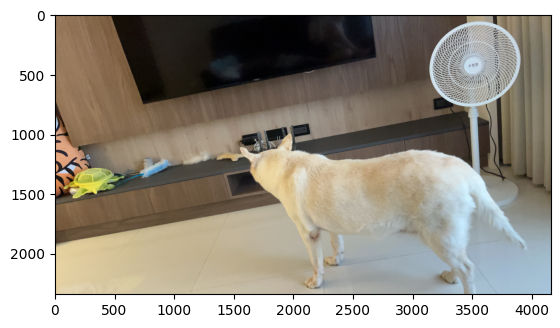

In [108]:
x=make_predictions('drive/MyDrive/00AI/valid_other/bo4.JPG')
x

1/1 [==============================] - 0s 18ms/step


array([[9.336641]], dtype=float32)

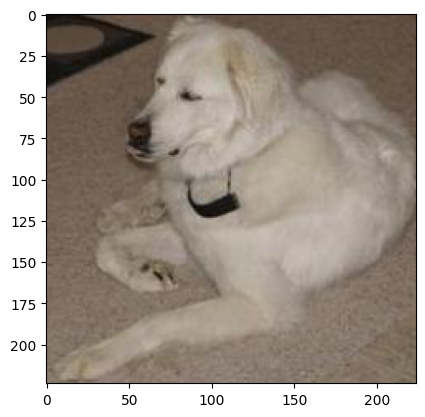

In [109]:
make_predictions('drive/MyDrive/00AI/valid_other/not_bo1.jpg')

In [110]:
def my_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

1/1 [==============================] - 0s 70ms/step
It's Bo! Let him in!


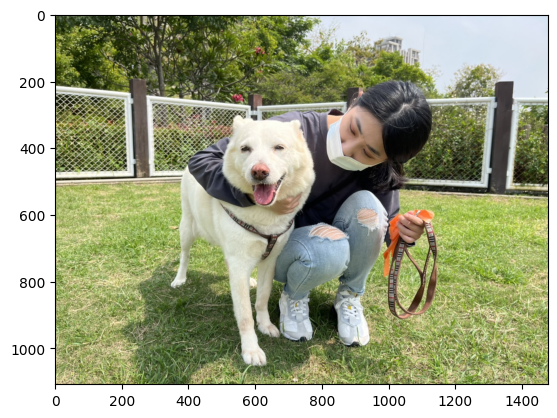

In [124]:
my_doggy_door('drive/MyDrive/00AI/valid_other/bo2.JPG')

1/1 [==============================] - 0s 22ms/step
That's not Bo! Stay out!


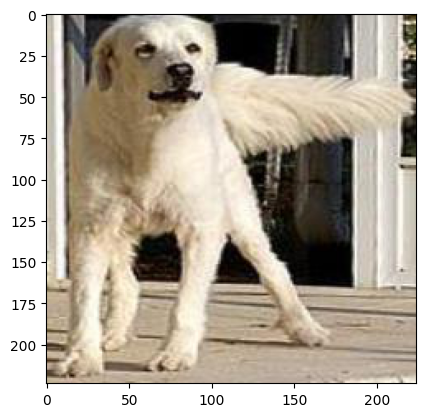

In [112]:
my_doggy_door('drive/MyDrive/00AI/valid_other/not_bo3.jpg')